## ```logistic Regression```

#### this is used for classification of data in one form e.g. win/loss, etc.
#### this used for probability.
#### it's outcome is binary.

difference between linea regression and logistic regression

parameter     |   linear        | logistic

intercept     |   y = mx + c    |   y = 1 / (1 + e^(-z))

slope         |   y = mx + c    |   y = 1 / (1 + e^(-z))

output        |   continuous    |   0 or 1

function      |   y = mx + c    |   y = 1 / (1 + e^(-z)) or sigmoid

goal          |   predict value |   predict 0 or 1(probability)


🔹 Log Loss kya batata hai?
Log Loss batata hai ki model ki predicted probabilities kitni confident aur accurate hain.
Agar model wrong prediction karta hai with high confidence, to uska log loss zyada hoga.
Agar correct prediction karta hai with high confidence, to log loss kam hoga.

🔹 Log Loss ka Formula (Binary Classification ke liye)
For a single data point:

LogLoss=−[𝑦⋅log(𝑝)+(1−𝑦)⋅log(1−𝑝)]
LogLoss=−[y⋅log(p)+(1−y)⋅log(1−p)]
Where:

y = actual label (0 ya 1)

p = predicted probability of class 1

Agar aapke paas n samples hain, to average log loss:

LogLoss=−1𝑛∑𝑖=1𝑛[𝑦𝑖⋅log(𝑝𝑖)+(1−𝑦𝑖)⋅log(1−𝑝𝑖)]
LogLoss=−n1i=1∑n [yi⋅log(pi )+(1−yi)⋅log(1−pi)]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("cust_satisfaction.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [4]:
df.duplicated()
df.duplicated().sum()

np.int64(172)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [9]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [10]:
loyal_customer=df[df['Customer Type']=='Loyal Customer']
disloyal_customer=df[df['Customer Type']=='disloyal Customer']

In [11]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [12]:
balance_df=pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df.shape

(38905, 12)

In [13]:
cat_col=balance_df.select_dtypes(include='object')
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
60660,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
38571,Male,Loyal Customer,Business travel,Business,satisfied
87142,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied
63979,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
17799,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied


In [14]:
#cat_col=cat_col.drop([])

In [15]:
num_col=balance_df.select_dtypes(exclude=["object"])
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
60660,49,551,4,4,1,0,0.0
38571,54,3700,4,4,3,20,29.0
87142,25,2551,2,3,2,12,6.0
63979,7,272,2,4,2,0,5.0
17799,31,758,1,2,1,15,21.0


In [16]:
#encoding if objects
# dt={
#     "Male":0,
#     "Female":1
# }
# cat_col['Gender']=cat_col['Gender'].map(dt)
# cat_col['Gender']

In [17]:
# dt1={
#     "Loyal Customer":0,
#     "disloyal Customer":1
# }
# cat_col['Customer Type']=cat_col['Customer Type'].map(dt1)
# cat_col['Customer Type']

In [18]:
# dt2={
#     "satisfied":0,
#     "neutral or dissatisfied":1
# }
# cat_col['satisfaction']=cat_col['satisfaction'].map(dt2)
# cat_col['satisfaction']

In [19]:
# dt3={
    
#     "Personal Travel":0,
#     "Business travel":1
# }
# cat_col["Type of Travel"]=cat_col["Type of Travel"].map(dt3)
# cat_col.head()

In [20]:
# dt4={
    
#     "Eco Plus":0,
#     "Business":1
# }
# cat_col["Class"]=cat_col["Class"].map(dt4)
# cat_col.head()

In [21]:
# 0-1 encoding
#pd.get_dummies(cat_col,drop_first=True).astype(int).head()

In [22]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

ohe=OneHotEncoder(drop='if_binary')
cat_cal_encoded=ohe.fit_transform(cat_col).toarray()
cat_cal_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [23]:
column_names=list(ohe.get_feature_names_out())
column_names

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [24]:
one_hot=pd.DataFrame(cat_cal_encoded,columns=column_names)
one_hot.head()


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
one_hot=one_hot.reset_index(drop=True)
num_col=num_col.reset_index(drop=True)

In [26]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,49,551,4,4,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,54,3700,4,4,3,20,29.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,25,2551,2,3,2,12,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7,272,2,4,2,0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,31,758,1,2,1,15,21.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [27]:
matrix=final_df.corr()
matrix

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.000000,0.137121,0.072388,-0.048934,0.054017,-0.012295,-0.012465,0.016941,-0.380131,0.073659,0.168231,-0.174637,0.015930,0.120825
Flight Distance,0.137121,1.000000,0.116839,0.051011,0.086272,-0.001830,-0.009302,0.015063,-0.331014,-0.124483,0.376742,-0.339204,-0.074952,0.273655
Inflight entertainment,0.072388,0.116839,1.000000,0.245997,0.800812,-0.016905,-0.021584,0.012581,-0.139511,-0.063222,0.134174,-0.121462,-0.025293,0.283752
Baggage handling,-0.048934,0.051011,0.245997,1.000000,0.060051,-0.006920,-0.010301,0.031440,0.034871,-0.030722,0.241797,-0.206157,-0.072727,0.222481
Cleanliness,0.054017,0.086272,0.800812,0.060051,1.000000,0.000440,-0.002307,0.011490,-0.109114,-0.023279,0.093754,-0.083487,-0.020626,0.219189
Departure Delay in Minutes,-0.012295,-0.001830,-0.016905,-0.006920,0.000440,1.000000,0.962601,-0.000973,0.009871,-0.006718,-0.020248,0.018487,0.003481,-0.042674
Arrival Delay in Minutes,-0.012465,-0.009302,-0.021584,-0.010301,-0.002307,0.962601,1.000000,-0.003192,0.011951,-0.006025,-0.026445,0.023987,0.004883,-0.051624
Gender_Male,0.016941,0.015063,0.012581,0.031440,0.011490,-0.000973,-0.003192,1.000000,-0.042985,0.019130,0.024989,-0.006724,-0.038609,0.029796
Customer Type_disloyal Customer,-0.380131,-0.331014,-0.139511,0.034871,-0.109114,0.009871,0.011951,-0.042985,1.000000,-0.461554,-0.109881,0.149405,-0.085757,-0.250830
Type of Travel_Personal Travel,0.073659,-0.124483,-0.063222,-0.030722,-0.023279,-0.006718,-0.006025,0.019130,-0.461554,1.000000,-0.376604,0.325444,0.103998,-0.265554


<Axes: >

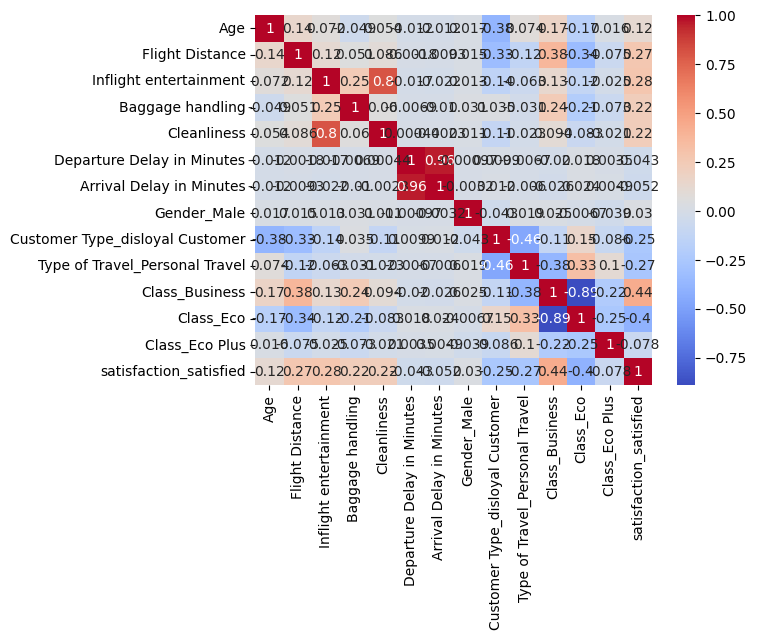

In [28]:
sns.heatmap(matrix,annot=True,cmap="coolwarm")


In [29]:
x=final_df.drop("satisfaction_satisfied",axis=1)
y=final_df["satisfaction_satisfied"]

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
model.score(x_test,y_test)

0.7615987662254209

In [33]:
model.score(x_train,y_train)

0.7604099730111811

In [34]:
y_pred=model.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.], shape=(7781,))

In [35]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
18536,1.0,0.0
36240,0.0,0.0
5426,0.0,0.0
21679,1.0,0.0
18714,0.0,0.0
...,...,...
23667,0.0,0.0
9774,0.0,0.0
24880,0.0,0.0
38451,1.0,0.0


In [36]:
print(y_test.value_counts())

satisfaction_satisfied
0.0    4992
1.0    2789
Name: count, dtype: int64


In [39]:
y_pred = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(7781,))